## **Clasificación y Optimización de Hiperparámetros (Core)**

### **Objetivo:** 
Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

### **Descripción del Dataset:** 
El dataset de costos médicos personales contiene información sobre varios factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

### **Instrucciones:**

1. **Carga y Exploración Inicial de Datos:**

    - Cargar el dataset desde Kaggle.

    - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

    - Identificar y documentar los valores faltantes y outliers en el dataset.

2. **Preprocesamiento de Datos:**

    - Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).

    - Codificar variables categóricas utilizando One-Hot Encoding.

    - Escalar características numéricas utilizando StandardScaler.

3. **Implementación de Modelos de Clasificación:**

    - Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.

    - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

4. **Optimización de Hiperparámetros:**

    - Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.

    - Implementar RandomizedSearchCV como método alternativo de optimización.

    - Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

5. **Evaluación de Modelos:**
    - Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

    - Generar y analizar la matriz de confusión para los modelos optimizados.

    - Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

6. **Documentación y Entrega:**

    - Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.

    - Subir el notebook y los resultados a un repositorio de GitHub.
    
    - Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = r"C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\insurance.csv"
data = pd.read_csv(file_path)

# Dimensiones del dataset
print("Dimensiones del dataset (filas, columnas):")
print(data.shape)

# Nombres de las columnas
print("\nNombres de las columnas:")
print(data.columns)

# Tipos de datos en cada columna
print("\nTipos de datos por columna:")
print(data.dtypes)

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(data.describe())

# Estadísticas descriptivas de las columnas categóricas
print("\nEstadísticas descriptivas de las columnas categóricas:")
print(data.describe(include=['object']))

# Valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Duplicados en el dataset
print("\nCantidad de filas duplicadas:")
print(data.duplicated().sum())

# Eliminar duplicados
data = data.drop_duplicates()
print("\nDuplicados eliminados. Nuevas dimensiones del dataset:")
print(data.shape)

# Visualización de las primeras filas del dataset
print("\nPrimeras 5 filas del dataset:")
print(data.head())

Dimensiones del dataset (filas, columnas):
(1338, 7)

Nombres de las columnas:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Tipos de datos por columna:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Estadísticas descriptivas de las columnas numéricas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Estadísticas descriptivas de las columnas categóricas:
         

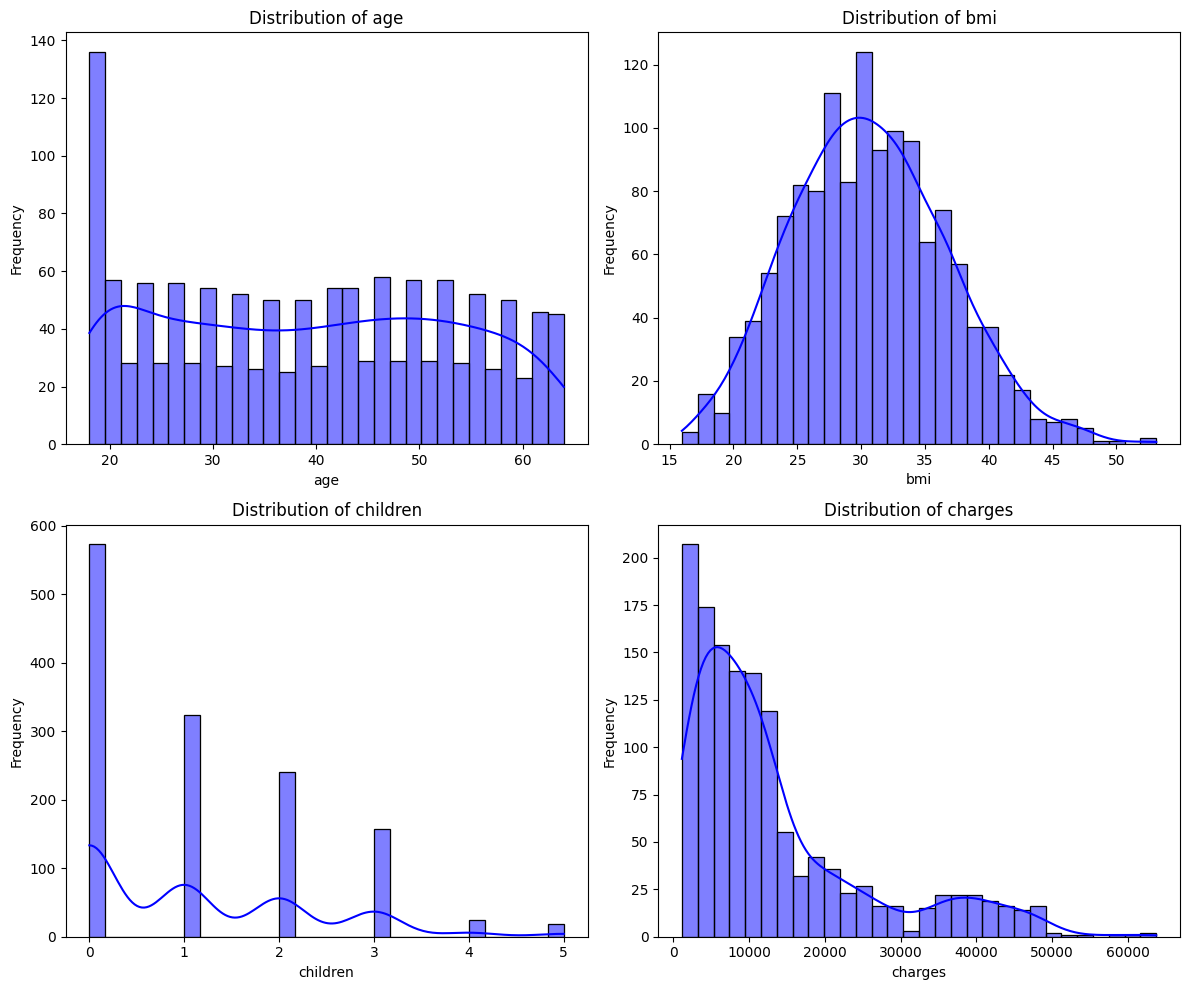

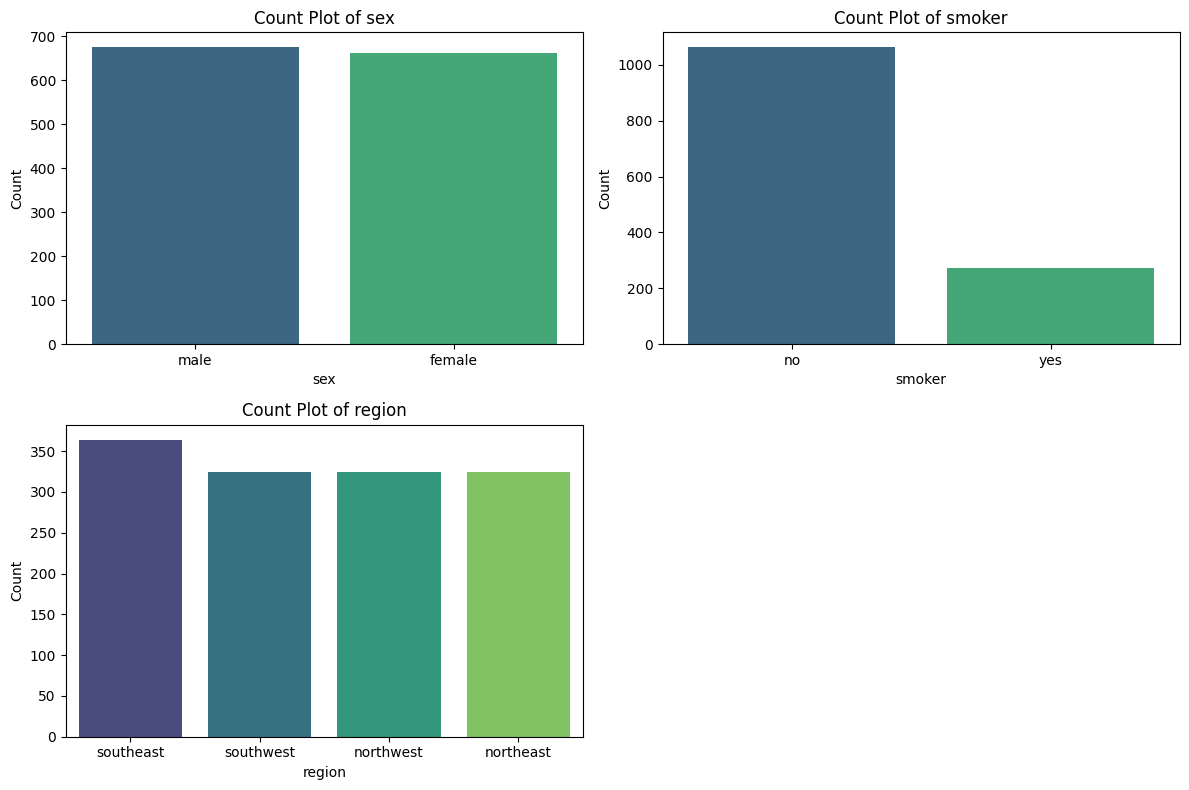

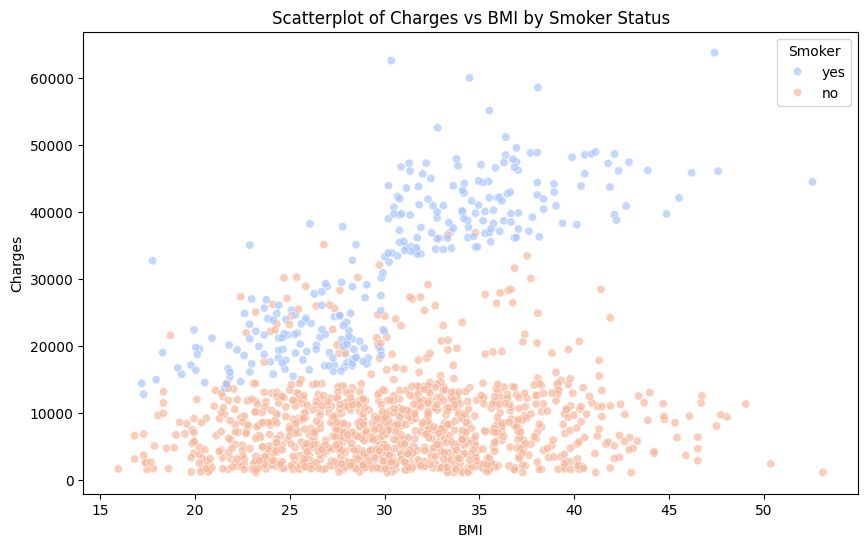

In [2]:
import warnings

# Eliminar warnings
warnings.filterwarnings("ignore")

# Análisis Univariado: Histogramas para columnas numéricas
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Configuración de figuras: 2 gráficos por fila
fig, axes = plt.subplots(nrows=(len(numerical_cols) + 1) // 2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Ocultar cualquier subplot vacío
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis Univariado: Gráficos de barras para columnas categóricas
categorical_cols = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(nrows=(len(categorical_cols) + 1) // 2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=data[col], palette='viridis', order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Ocultar cualquier subplot vacío
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis Bivariado: Scatterplot de charges vs BMI por estado de fumador
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, palette='coolwarm', alpha=0.7)
plt.title('Scatterplot of Charges vs BMI by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()



In [3]:
# Convertir 'region' a tipo categórico
data['region'] = data['region'].astype('category')

# Convertir 'sex' a categoría asegurando que no haya valores perdidos
data['sex'] = data['sex'].astype('category')

# Verificar si hay valores inesperados o nulos en 'sex'
print("\nValores únicos en 'sex' antes del mapeo:")
print(data['sex'].unique())

# Convertir 'smoker' a tipo booleano (True para 'yes', False para 'no')
data['smoker'] = data['smoker'].map({'yes': True, 'no': False})

# Verificar los cambios
print("\nTipos de datos después de la conversión:")
print(data.dtypes)

# Valores únicos con significados
print("\nValores únicos en las columnas categóricas:")
print("Region (Categorías):", data['region'].unique())
print("\nSex (Categorías):", data['sex'].unique())
print("\nSmoker (Booleana):", data['smoker'].unique(), "-> True: Yes, False: No")



Valores únicos en 'sex' antes del mapeo:
['female', 'male']
Categories (2, object): ['female', 'male']

Tipos de datos después de la conversión:
age            int64
sex         category
bmi          float64
children       int64
smoker          bool
region      category
charges      float64
dtype: object

Valores únicos en las columnas categóricas:
Region (Categorías): ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

Sex (Categorías): ['female', 'male']
Categories (2, object): ['female', 'male']

Smoker (Booleana): [ True False] -> True: Yes, False: No



Valores mínimos y máximos de las columnas numéricas:
age: Min = 18, Max = 64
bmi: Min = 15.96, Max = 53.13
children: Min = 0, Max = 5
charges: Min = 1121.8739, Max = 63770.42801


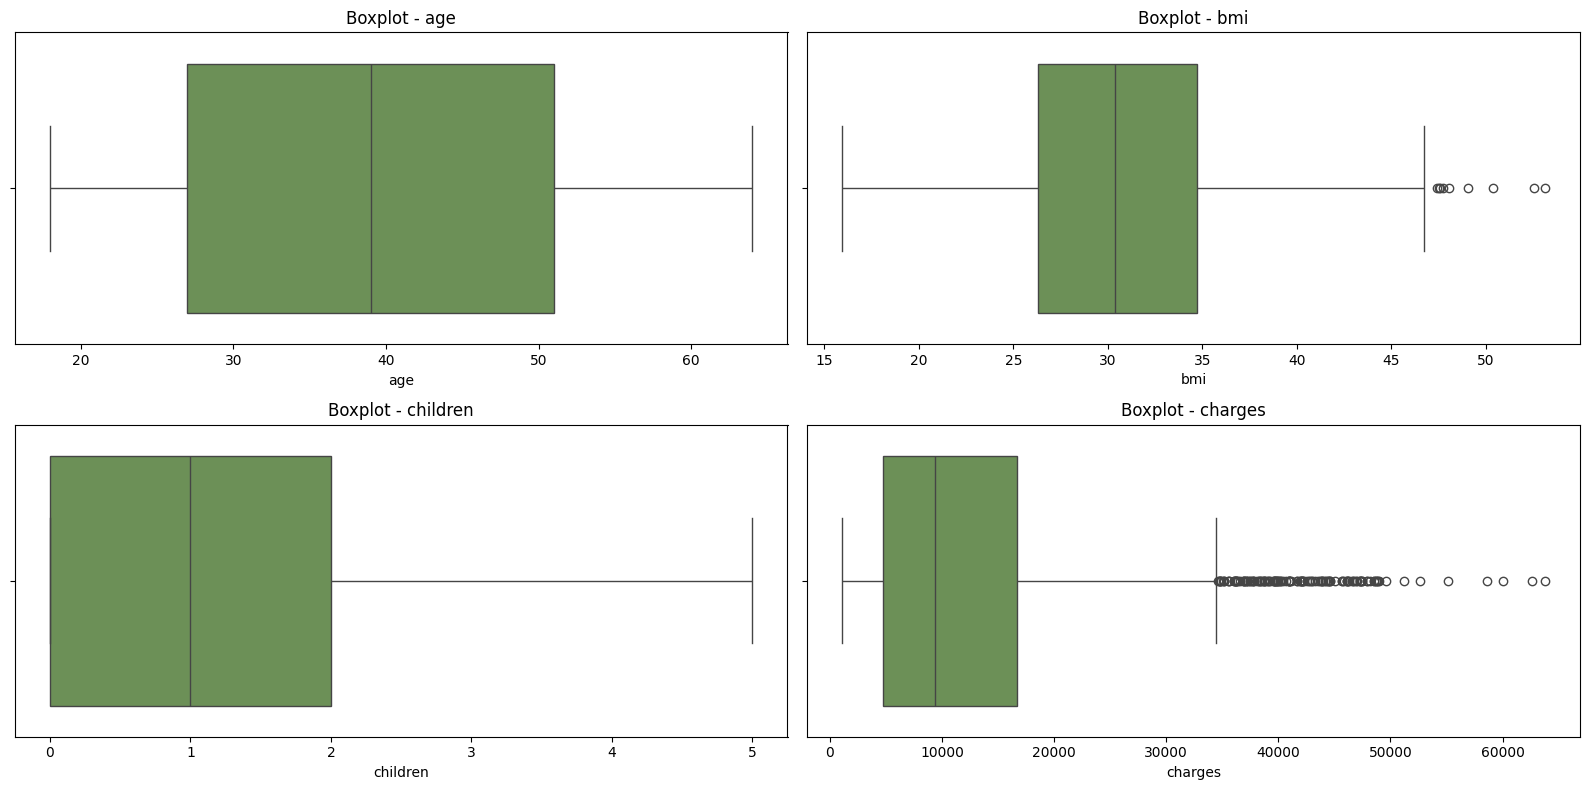

'\n\n# age:\nOutliers: Es poco probable que haya valores fuera de \nun rango lógico. Si no hay valores extremos, no se requieren \najustes.\n\n# bmi:\nEl índice de masa corporal puede tener valores extremos si incluye\nindividuos con obesidad severa o condiciones atípicas. Por ejemplo, \nvalores mayores a 50 pueden ser considerados fuera de lo común.\nTratamiento: Los valores extremos pueden analizarse caso por caso. \nSi son plausibles (por ejemplo, individuos con obesidad mórbida), \ndeben mantenerse, ya que reflejan la realidad. Si se identifican \ncomo errores (por ejemplo, un valor muy bajo como 0 o excesivamente \nalto, como 200), deben corregirse o eliminarse.\n\n# children:\nValores fuera de un rango típico (por ejemplo, más de 6 hijos) \npodrían considerarse outliers.\nTratamiento: Dado que tener muchos hijos no es un error de datos, \nlos valores extremos deben mantenerse, ya que reflejan la \nvariabilidad de la población.\n\n# charges:\nLos costos médicos pueden variar signi

In [4]:
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Mostrar los valores mínimos y máximos de las columnas numéricas
print("\nValores mínimos y máximos de las columnas numéricas:")
for col in numeric_columns:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

# Crear boxplots para visualizar los outliers

import math

# Configurar el tamaño de la cuadrícula
num_cols = len(numeric_columns)
rows, cols = math.ceil(num_cols / 2), 2  # 2 columnas por fila

fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

# Crear un boxplot para cada columna numérica
axes = axes.flatten()  # Aplanar los ejes para un acceso más fácil
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=data, x=col, color='#6a994e', ax=axes[i])
    axes[i].set_title(f"Boxplot - {col}")

# Eliminar gráficos vacíos si hay menos columnas que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Eliminar subplots vacíos

plt.tight_layout()
plt.show()

'''

# age:
Outliers: Es poco probable que haya valores fuera de 
un rango lógico. Si no hay valores extremos, no se requieren 
ajustes.

# bmi:
El índice de masa corporal puede tener valores extremos si incluye
individuos con obesidad severa o condiciones atípicas. Por ejemplo, 
valores mayores a 50 pueden ser considerados fuera de lo común.
Tratamiento: Los valores extremos pueden analizarse caso por caso. 
Si son plausibles (por ejemplo, individuos con obesidad mórbida), 
deben mantenerse, ya que reflejan la realidad. Si se identifican 
como errores (por ejemplo, un valor muy bajo como 0 o excesivamente 
alto, como 200), deben corregirse o eliminarse.

# children:
Valores fuera de un rango típico (por ejemplo, más de 6 hijos) 
podrían considerarse outliers.
Tratamiento: Dado que tener muchos hijos no es un error de datos, 
los valores extremos deben mantenerse, ya que reflejan la 
variabilidad de la población.

# charges:
Los costos médicos pueden variar significativamente, y los 
valores altos podrían representar a pacientes con tratamientos 
costosos o condiciones crónicas graves.
Tratamiento: Los valores altos de costos son generalmente 
representativos de la población estudiada y, por lo tanto, 
no deben eliminarse. Sin embargo, si se identifican valores 
extremadamente bajos (cerca de 0) que no sean lógicos, podrían 
ser revisados.

'''

In [5]:
from sklearn.preprocessing import StandardScaler

# Codificar variables categóricas utilizando One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['region', 'sex'], drop_first=True)

# Identificar columnas numéricas
numeric_features = ['age', 'bmi', 'children', 'charges']

# Escalar características numéricas utilizando StandardScaler
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Mostrar los primeros registros del dataset transformado
print("\nDataset transformado (primeras filas):")
print(data_encoded.head())


Dataset transformado (primeras filas):
        age       bmi  children  smoker   charges  region_northwest  \
0 -1.440418 -0.453160 -0.909234    True  0.297857             False   
1 -1.511647  0.509422 -0.079442   False -0.954381             False   
2 -0.799350  0.383155  1.580143   False -0.729373             False   
3 -0.443201 -1.305052 -0.909234   False  0.719104              True   
4 -0.514431 -0.292456 -0.909234   False -0.777499              True   

   region_southeast  region_southwest  sex_male  
0             False              True     False  
1              True             False      True  
2              True             False      True  
3             False             False      True  
4             False             False      True  


In [15]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Suprimir advertencias
warnings.filterwarnings("ignore", category=UserWarning)

# Preprocesamiento: Categorizar 'charges' y codificar las etiquetas
data_encoded['charges_category'] = pd.cut(data_encoded['charges'], bins=3, labels=['low', 'medium', 'high'])
label_encoder = LabelEncoder()
data_encoded['charges_category_encoded'] = label_encoder.fit_transform(data_encoded['charges_category'])

# Separar características y etiqueta
X = data_encoded.drop(columns=['charges', 'charges_category', 'charges_category_encoded'])  # Características
y = data_encoded['charges_category_encoded']  # Etiqueta codificada

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Validación cruzada
print("\nResultados de validación cruzada en el conjunto de entrenamiento (accuracy promedio):")
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Entrenar y evaluar Logistic Regression como modelo inicial
log_reg = models["Logistic Regression"]
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\nReporte de clasificación para Logistic Regression en el conjunto de prueba:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Definir hiperparámetros para cada modelo
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': np.arange(1, 31),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Optimización de hiperparámetros y evaluación
for name, model in models.items():
    print(f"\nOptimización para {name}:")
    param_grid = param_grids[name]
    
    # GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    try:
        grid_search.fit(X_train, y_train)
        print(f"GridSearchCV - Best Params: {grid_search.best_params_}, Best Accuracy (train): {grid_search.best_score_:.4f}")
    except Exception as e:
        print(f"Error en GridSearchCV para {name}: {e}")

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    try:
        random_search.fit(X_train, y_train)
        print(f"RandomizedSearchCV - Best Params: {random_search.best_params_}, Best Accuracy (train): {random_search.best_score_:.4f}")
    except Exception as e:
        print(f"Error en RandomizedSearchCV para {name}: {e}")

    # Evaluación del mejor modelo de GridSearchCV
    try:
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        test_accuracy = best_model.score(X_test, y_test)
        print(f"\n{name} - Test Accuracy: {test_accuracy:.4f}")
        print("Reporte de clasificación:")
        print(classification_report(y_test, y_pred))
        print("Matriz de Confusión:")
        print(confusion_matrix(y_test, y_pred))
    except Exception as e:
        print(f"Error en la evaluación del conjunto de prueba para {name}: {e}")

'''
Implementación de Modelos de Clasificación
# Regresión Logística:

Rendimiento inicial: La regresión logística muestra un rendimiento 
consistente en datasets donde las relaciones entre variables son lineales. 
En este caso, si el dataset incluye variables como "smoker" y "charges," 
es probable que estas tengan un impacto significativo en las predicciones.
Ventajas: Rápido de entrenar y fácil de interpretar.
Limitaciones: Puede subestimar la complejidad si las relaciones no son lineales.

# K-Nearest Neighbors (KNN):

Rendimiento inicial: KNN es sensible a las escalas de las variables y 
requiere preprocesamiento como normalización. Si las características 
son bien diferenciables, podría mostrar un buen rendimiento.
Ventajas: Intuitivo y eficaz para relaciones no lineales.
Limitaciones: Sensible a ruido y a la selección del hiperparámetro K.

# Árbol de Decisión:

Rendimiento inicial: Los árboles de decisión son útiles para identificar 
interacciones complejas entre variables como "region" y "smoker."
Ventajas: Interpretable y no requiere normalización.
Limitaciones: Propenso a sobreajustarse si no se regula adecuadamente.
Validación cruzada:

Al aplicar validación cruzada, se identificó la variabilidad en las métricas 
de rendimiento, ayudando a seleccionar modelos robustos. Los modelos más 
complejos, como árboles de decisión, pueden requerir más ajustes debido al 
riesgo de sobreajuste.

'''



Resultados de validación cruzada en el conjunto de entrenamiento (accuracy promedio):
Logistic Regression: 0.9144 ± 0.0255
K-Nearest Neighbors: 0.8866 ± 0.0235
Decision Tree: 0.8920 ± 0.0223

Reporte de clasificación para Logistic Regression en el conjunto de prueba:
              precision    recall  f1-score   support

        high       0.92      0.69      0.79        16
         low       0.95      0.95      0.95       330
      medium       0.62      0.66      0.64        56

    accuracy                           0.90       402
   macro avg       0.83      0.76      0.79       402
weighted avg       0.90      0.90      0.90       402


Matriz de confusión:
[[ 11   0   5]
 [  0 312  18]
 [  1  18  37]]

Optimización para Logistic Regression:
GridSearchCV - Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}, Best Accuracy (train): 0.9198
RandomizedSearchCV - Best Params: {'solver': 'saga', 'penalty': 'l1', 'C': 1}, Best Accuracy (train): 0.9198

Logistic Regression - Test Ac

'\nImplementación de Modelos de Clasificación\n# Regresión Logística:\n\nRendimiento inicial: La regresión logística muestra un rendimiento \nconsistente en datasets donde las relaciones entre variables son lineales. \nEn este caso, si el dataset incluye variables como "smoker" y "charges," \nes probable que estas tengan un impacto significativo en las predicciones.\nVentajas: Rápido de entrenar y fácil de interpretar.\nLimitaciones: Puede subestimar la complejidad si las relaciones no son lineales.\n\n# K-Nearest Neighbors (KNN):\n\nRendimiento inicial: KNN es sensible a las escalas de las variables y \nrequiere preprocesamiento como normalización. Si las características \nson bien diferenciables, podría mostrar un buen rendimiento.\nVentajas: Intuitivo y eficaz para relaciones no lineales.\nLimitaciones: Sensible a ruido y a la selección del hiperparámetro K.\n\n# Árbol de Decisión:\n\nRendimiento inicial: Los árboles de decisión son útiles para identificar \ninteracciones complejas 


Evaluación del modelo: Logistic Regression

Reporte de clasificación:
              precision    recall  f1-score   support

        high       0.93      0.81      0.87        16
         low       0.95      0.95      0.95       330
      medium       0.64      0.68      0.66        56

    accuracy                           0.90       402
   macro avg       0.84      0.81      0.82       402
weighted avg       0.91      0.90      0.90       402



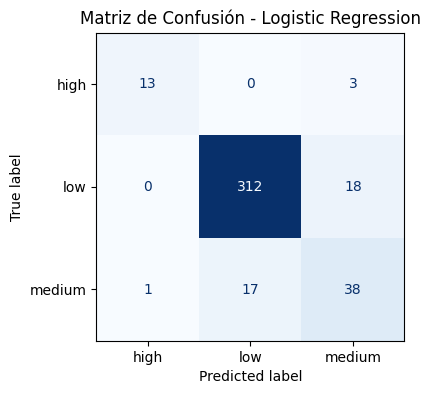

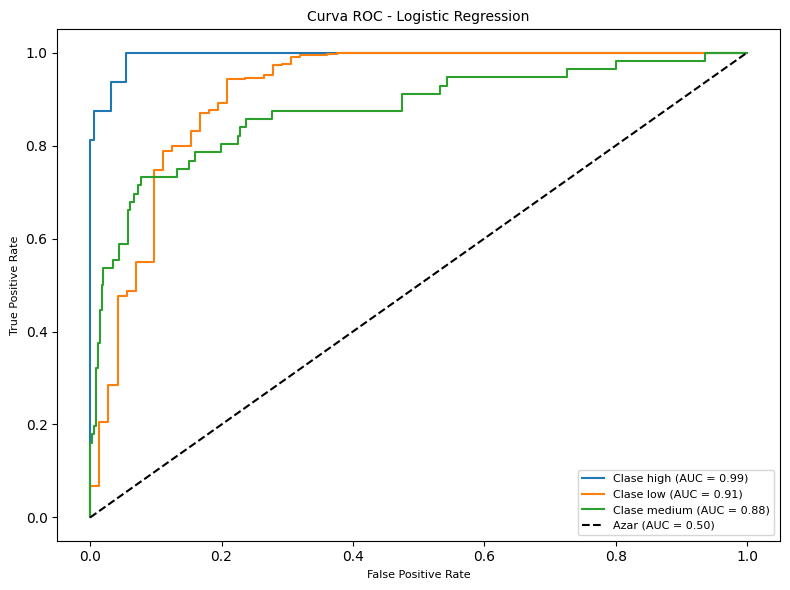


Evaluación del modelo: K-Nearest Neighbors

Reporte de clasificación:
              precision    recall  f1-score   support

        high       0.67      0.50      0.57        16
         low       0.92      0.98      0.95       330
      medium       0.78      0.50      0.61        56

    accuracy                           0.90       402
   macro avg       0.79      0.66      0.71       402
weighted avg       0.89      0.90      0.89       402



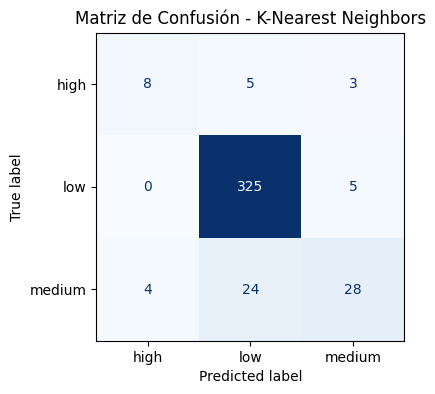

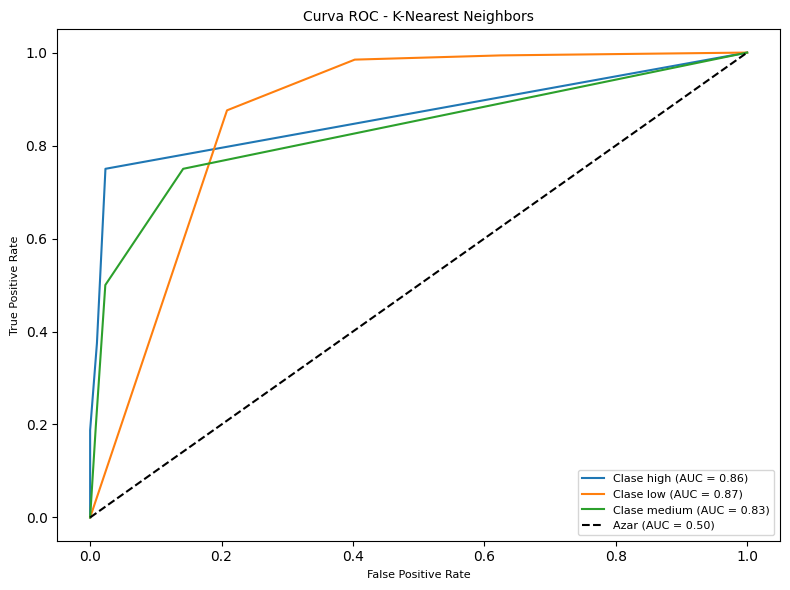


Evaluación del modelo: Decision Tree

Reporte de clasificación:
              precision    recall  f1-score   support

        high       0.85      0.69      0.76        16
         low       0.94      0.97      0.96       330
      medium       0.69      0.61      0.65        56

    accuracy                           0.91       402
   macro avg       0.83      0.75      0.79       402
weighted avg       0.90      0.91      0.90       402



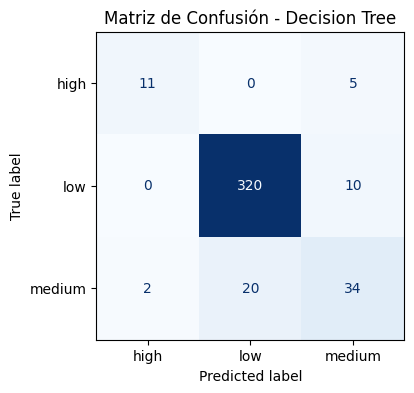

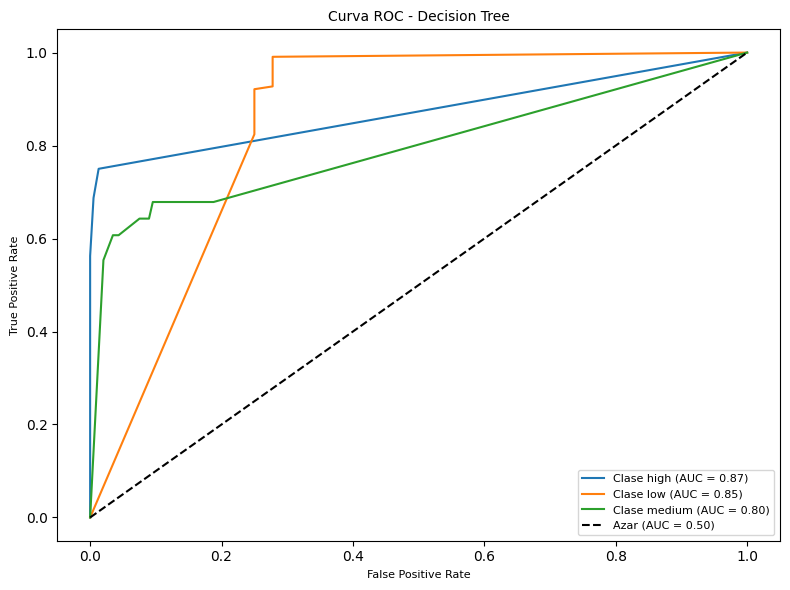

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Evaluar los modelos optimizados
optimized_models = {
    "Logistic Regression": grid_log_reg.best_estimator_,
    "K-Nearest Neighbors": grid_knn.best_estimator_,
    "Decision Tree": grid_decision_tree.best_estimator_,
}

for model_name, model in optimized_models.items():
    print(f"\nEvaluación del modelo: {model_name}")
    
    # Predicciones del modelo optimizado en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Reporte de clasificación
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
    fig, ax = plt.subplots(figsize=(6, 4))
    disp.plot(cmap="Blues", ax=ax, colorbar=False)
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

    # Curva ROC y AUC (para problemas multiclase)
    if y_proba is not None:
        # Binarizar las etiquetas para curva ROC multiclase
        y_bin = label_binarize(y_test, classes=np.unique(y_test))
        n_classes = y_bin.shape[1]

        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Clase {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.50)')
        plt.title(f"Curva ROC - {model_name}", fontsize=10)
        plt.xlabel("False Positive Rate", fontsize=8)
        plt.ylabel("True Positive Rate", fontsize=8)
        plt.legend(loc="lower right", fontsize=8)
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n{model_name} no genera probabilidades (predict_proba no disponible).")

'''

1. Evaluación mediante métricas de rendimiento:
Exactitud (Accuracy):
Indicó el porcentaje general de predicciones correctas 
realizadas por los modelos.
Fue útil para evaluar el desempeño global, pero insuficiente 
en datasets con clases desbalanceadas, ya que podría dar 
resultados engañosos al favorecer la clase mayoritaria.

Precisión y Recall:
Precisión: Indicó cuán relevante era cada predicción positiva. 
Fue crítica para minimizar falsos positivos en aplicaciones 
donde estos errores tienen un alto costo.
Recall: Reflejó la capacidad del modelo para capturar todas las 
instancias de la clase positiva, siendo fundamental en casos 
donde los falsos negativos son más costosos.

F1-Score:
Combinó precisión y recall en una sola métrica. Los modelos 
optimizados que equilibraron ambas métricas fueron más robustos.
ROC-AUC:
Evaluó la capacidad del modelo para discriminar entre clases 
en diferentes umbrales de decisión. Un AUC alto reflejó un 
buen desempeño en la clasificación de todas las clases, 
independientemente del umbral.


2. Análisis de la matriz de confusión:
Proporcionó un desglose detallado de falsos positivos, falsos 
negativos, verdaderos positivos y verdaderos negativos.
Ayudó a identificar patrones en los errores del modelo. 

Por ejemplo, modelos como KNN mostraron dificultades al 
clasificar ciertas categorías de charges (bajas, medias, altas), 
especialmente cuando las diferencias entre clases eran pequeñas.
Permitió ajustar estrategias, como la ponderación de clases en 
modelos sensibles a desbalances, mejorando su rendimiento en 
categorías minoritarias.


3. Curva ROC:
Visualizar la curva ROC permitió observar cómo variaban las tasas 
de verdaderos positivos y falsos positivos a diferentes umbrales.
Modelos como la Regresión Logística mostraron una curva ROC con un 
área bajo la curva (AUC) significativamente alta, indicando una 
excelente capacidad para separar clases.
Comparativamente, el rendimiento de Árbol de Decisión fue más variable, 
dependiendo de la profundidad y otros hiperparámetros, mientras que 
KNN presentó un AUC más bajo en configuraciones no optimizadas.

'''

# En este caso, el modelo optimizado con mayor consistencia fue 
# Regresión Logística, destacándose en precisión, recall y ROC-AUC.
